Run all the cells and make changes to only the allowed cells. Do not change the code in the restricted region

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [2]:
dataset_path = "Dataset"
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
crops = ['Cashew', 'Cassava', 'Maize', 'Tomato']  # List of crops

# Create unified train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def restructure_dataset():
    for crop in crops:
        crop_dir = os.path.join(dataset_path, crop)  # Crop folder path
        for data_split in ['train_set', 'test_set']:
            split_path = os.path.join(crop_dir, data_split)
            if not os.path.exists(split_path):
                print(f"Path not found: {split_path}")
                continue

            # Iterate through each category in the data split
            for category in os.listdir(split_path):
                category_path = os.path.join(split_path, category)
                if os.path.isdir(category_path):
                    # Create a unique name for the category folder
                    new_name = f"{category.replace(' ', '_')}_{crop.lower()}"
                    target_dir = train_dir if 'train' in data_split else test_dir
                    target_path = os.path.join(target_dir, new_name)

                    # Handle conflicts and move the directory
                    if os.path.exists(target_path):
                        print(f"Conflict: {target_path} already exists. Skipping.")
                        continue
                    
                    shutil.move(category_path, target_path)
                    print(f"Moved {category_path} to {target_path}")

# Run the restructuring
restructure_dataset()
print("Dataset restructuring completed!")

# Verify the directory structure
print("\nTrain Directory Contents:")
print(os.listdir(train_dir))

print("\nTest Directory Contents:")
print(os.listdir(test_dir))

Moved Dataset\Cashew\train_set\anthracnose to Dataset\train\anthracnose_cashew
Moved Dataset\Cashew\train_set\gumosis to Dataset\train\gumosis_cashew
Moved Dataset\Cashew\train_set\healthy to Dataset\train\healthy_cashew
Moved Dataset\Cashew\train_set\leaf miner to Dataset\train\leaf_miner_cashew
Moved Dataset\Cashew\train_set\red rust to Dataset\train\red_rust_cashew
Moved Dataset\Cashew\test_set\anthracnose to Dataset\test\anthracnose_cashew
Moved Dataset\Cashew\test_set\gumosis to Dataset\test\gumosis_cashew
Moved Dataset\Cashew\test_set\healthy to Dataset\test\healthy_cashew
Moved Dataset\Cashew\test_set\leaf miner to Dataset\test\leaf_miner_cashew
Moved Dataset\Cashew\test_set\red rust to Dataset\test\red_rust_cashew
Moved Dataset\Cassava\train_set\bacterial blight to Dataset\train\bacterial_blight_cassava
Moved Dataset\Cassava\train_set\brown spot to Dataset\train\brown_spot_cassava
Moved Dataset\Cassava\train_set\green mite to Dataset\train\green_mite_cassava
Moved Dataset\Cassa

In [3]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

# Do not change this code

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial_blight_cassava': 1, 'brown_spot_cassava': 2, 'fall_armyworm_maize': 3, 'grasshoper_maize': 4, 'green_mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf_beetle_maize': 11, 'leaf_blight_maize': 12, 'leaf_blight_tomato': 13, 'leaf_curl_tomato': 14, 'leaf_miner_cashew': 15, 'leaf_spot_maize': 16, 'mosaic_cassava': 17, 'red_rust_cashew': 18, 'septoria_leaf_spot_tomato': 19, 'streak_virus_maize': 20, 'verticulium_wilt_tomato': 21}


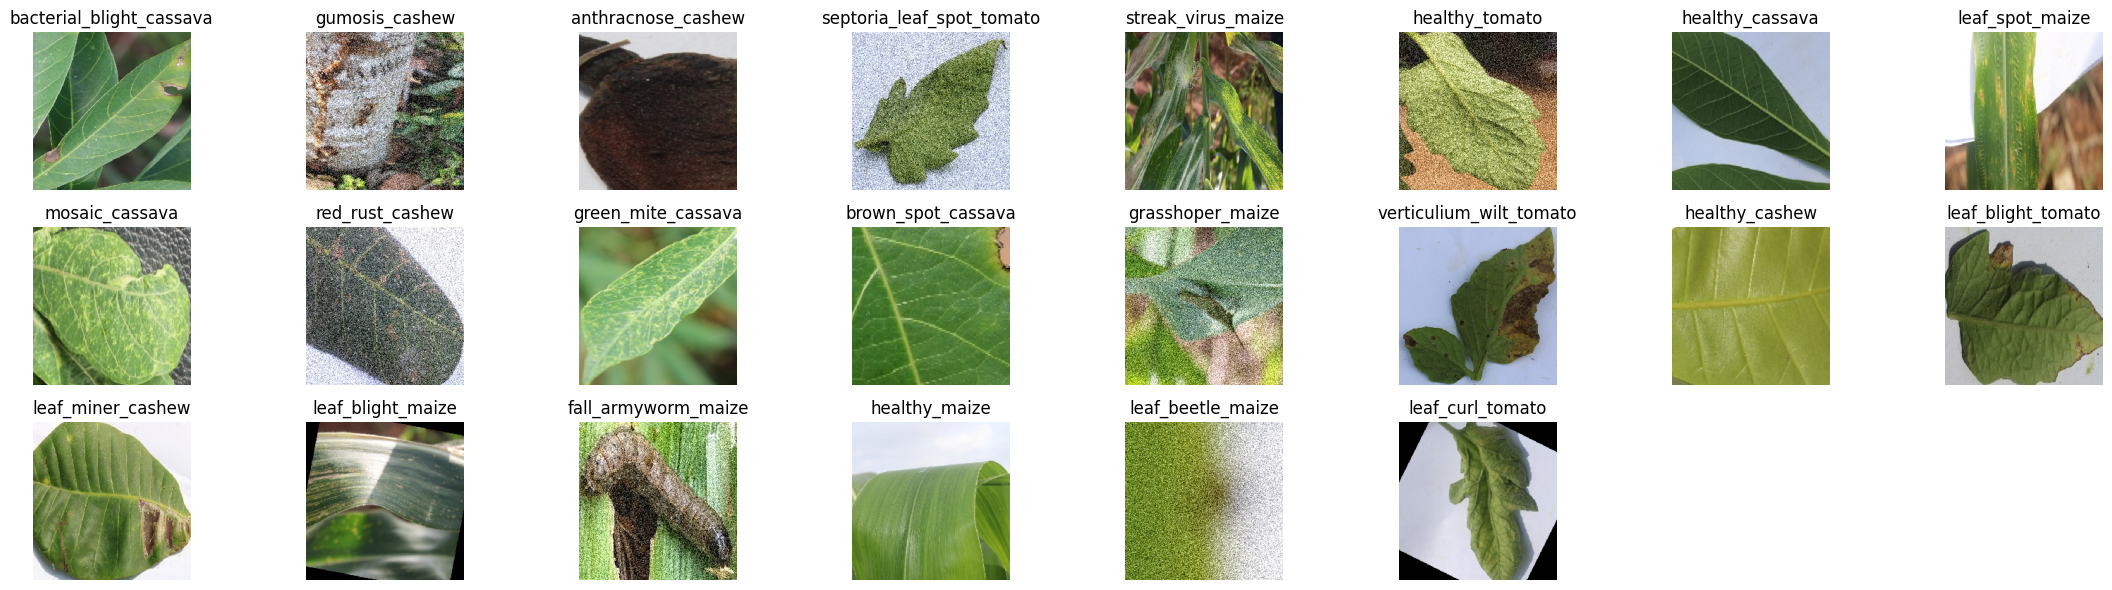

In [4]:
classes_found = train_generator.class_indices.keys()
class_seen = set()
images_to_display = []

# Iterate over the generator to extract one image per class
for _ in range(len(train_generator)):
    images, labels = next(train_generator)
    for img, label in zip(images, labels):
        class_index = np.argmax(label)
        class_name = list(classes_found)[class_index]
        if class_name not in class_seen:
            class_seen.add(class_name)
            images_to_display.append((img, class_name))
        if len(class_seen) == 22:  # Stop when all 22 classes are captured
            break
    if len(class_seen) == 22:
        break

# Plot one image for each class
plt.figure(figsize=(22, 6))
for i, (img, class_name) in enumerate(images_to_display):
    plt.subplot(3, 8, i+1)  # Adjust for number of classes
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


Run all the cells and the output must be clearly visible for all the cells.